# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1 Configurações iniciais

In [1]:
# importando bibliotecas
import pandas as pd
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

### 1.2 Dicionário de dados

In [2]:
# Lendo dicionario de dados
data_path = Path('../data/external/dicionario.csv')
df_dict = pd.read_csv(data_path, sep=';')

df_dict

,Variável,Significado,Tipo,Subtipo
0,instant,índice do registro,Quantitativa,Discreta
1,dteday,data,Qualitativa,Ordinal
2,season,estação,Qualitativa,Ordinal
3,yr,ano,Qualitativa,Ordinal
4,mnth,mês,Qualitativa,Ordinal
5,hr,hora,Qualitativa,Ordinal
6,holiday,se o dia é feriado ou não,Qualitativa,Nominal
7,weekday,dia da semana,Qualitativa,Ordinal
8,workingday,se o dia não é fim de semana nem feriado,Qualitativa,Nominal
9,weathersit,situação climática,Qualitativa,Ordinal


#### 1.2.1 Agrupamento de variáveis

|Grupo                |Variáveis                                                                     
|---------------------|---------------------------------------------------------------------------------
|`Clima`| `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`
|`Dia`  | `instant`, `dteday`, `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`

**Nota:** `cnt` não foi incluída em nenhum grupo pois é a variável alvo.

In [3]:
def group_separation(row):
    if row['Variável'] == 'cnt':
        return ''
    elif row['Variável'] in ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']:
        return 'Clima'
    else:
        return 'dia'


df_dict = df_dict.assign(
    Grupo = df_dict.apply(group_separation, axis=1)
)
columns_by_group = {
    group: df_dict.query("Grupo == @group")['Variável'].to_list()
    for group in df_dict.Grupo.unique()
}

df_dict

,Variável,Significado,Tipo,Subtipo,Grupo
0,instant,índice do registro,Quantitativa,Discreta,dia
1,dteday,data,Qualitativa,Ordinal,dia
2,season,estação,Qualitativa,Ordinal,dia
3,yr,ano,Qualitativa,Ordinal,dia
4,mnth,mês,Qualitativa,Ordinal,dia
5,hr,hora,Qualitativa,Ordinal,dia
6,holiday,se o dia é feriado ou não,Qualitativa,Nominal,dia
7,weekday,dia da semana,Qualitativa,Ordinal,dia
8,workingday,se o dia não é fim de semana nem feriado,Qualitativa,Nominal,dia
9,weathersit,situação climática,Qualitativa,Ordinal,Clima


### 1.3 Conjunto de dados

Leitura do conjunto de dados

In [4]:
data_path = Path('../data/raw/hour.csv')
df = pd.read_csv(data_path)

df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 1.4 Dados faltantes

Verificar se existe algum valor nulo (NaN).

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Não há nenhum valor nulo encontrado.

Checa se outros valores foram utilizados para representar dados faltantes.

In [7]:
uniques = {'Variável': df_dict['Variável'], 'Valores': []}
for index, row in df_dict.iterrows():
    uniques['Valores'].append(df[row['Variável']].unique())

df_uniques = pd.DataFrame.from_dict(uniques)
df_uniques

,Variável,Valores
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0..."
2,season,"[1, 2, 3, 4]"
3,yr,"[0, 1]"
4,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,hr,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,holiday,"[0, 1]"
7,weekday,"[6, 0, 1, 2, 3, 4, 5]"
8,workingday,"[0, 1]"
9,weathersit,"[1, 2, 3, 4]"


## 2. Perguntas de partida e hipóteses

### 2.1. A demanda por bicicletas é influenciada pela estação do ano?

Hipótese: O verão tem uma demanda maior devido ao clima ser mais propício.

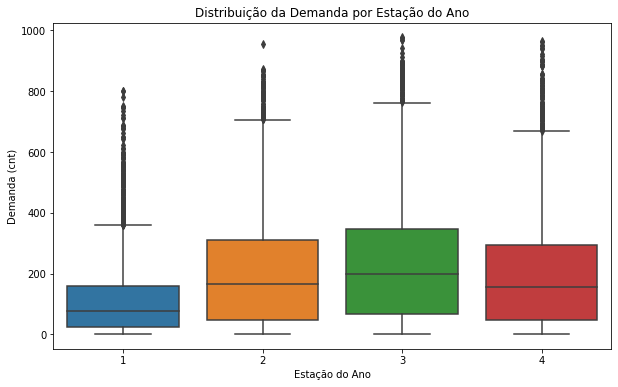

Resultado do teste ANOVA - F-statistic: 409.1810372630525, p-value: 7.40107139971279e-257
Há influência estatisticamente significativa da estação na demanda.


In [8]:
# Crie um boxplot para visualizar a distribuição da demanda por estação
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribuição da Demanda por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Demanda (cnt)')
plt.show()

# Realize um teste estatístico, como ANOVA, para verificar a influência da estação na demanda
from scipy.stats import f_oneway

# Divida o DataFrame em subconjuntos para cada estação
spring = df[df['season'] == 1]['cnt']
summer = df[df['season'] == 2]['cnt']
fall = df[df['season'] == 3]['cnt']
winter = df[df['season'] == 4]['cnt']

# Realize o teste ANOVA
f_statistic, p_value = f_oneway(spring, summer, fall, winter)

# Imprima o resultado do teste
print(f"Resultado do teste ANOVA - F-statistic: {f_statistic}, p-value: {p_value}")

# Analise o p-value para determinar se há influência estatisticamente significativa da estação na demanda
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Há influência estatisticamente significativa da estação na demanda.")
else:
    print("Não há influência estatisticamente significativa da estação na demanda.")

Criamos um boxplot para visualizar a distribuição da demanda por estação do ano.

Realizamos um teste estatístico ANOVA para verificar se há diferenças estatisticamente significativas na demanda entre as estações.

Comparamos o p-value com um nível de significância (alpha) para determinar se a estação do ano influencia estatisticamente a demanda por bicicletas.

### 2.2. A demanda é menor em feriados?

Hipótese: Em feriados, as pessoas tendem a não trabalhar, reduzindo a necessidade de transporte.

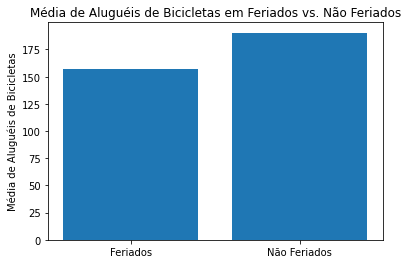

A diferença é estatisticamente significativa (p-valor = 4.5461689487652855e-05).
A demanda é menor em feriados.


In [9]:
# Filtrar os dados para dias de feriado e dias que não são feriados
feriados = df[df['holiday'] == 1]
nao_feriados = df[df['holiday'] == 0]

# Calcular a média de aluguéis para cada grupo
media_feriados = feriados['cnt'].mean()
media_nao_feriados = nao_feriados['cnt'].mean()

# Realizar um teste t de Student para verificar a diferença
t_stat, p_valor = stats.ttest_ind(feriados['cnt'], nao_feriados['cnt'])

# Plotar um gráfico de barras para visualização
plt.bar(['Feriados', 'Não Feriados'], [media_feriados, media_nao_feriados])
plt.ylabel('Média de Aluguéis de Bicicletas')
plt.title('Média de Aluguéis de Bicicletas em Feriados vs. Não Feriados')
plt.show()

# Imprimir o resultado do teste de hipótese
if p_valor < 0.05:
    print(f"A diferença é estatisticamente significativa (p-valor = {p_valor}).")
    print("A demanda é menor em feriados.")
else:
    print(f"A diferença não é estatisticamente significativa (p-valor = {p_valor}).")
    print("Não há evidência de que a demanda seja menor em feriados.")

### 2.3. A demanda é afetada pelo clima?

Hipótese: Dias claros têm uma demanda maior do que dias chuvosos ou nevados.

In [10]:
# Mapeie os valores de weathersit para condições claras ou não claras
conditions = {
    1: 'Claro',
    2: 'Não Claro',
    3: 'Não Claro',
    4: 'Não Claro'
}

df['condicao_climatica'] = df['weathersit'].map(conditions)

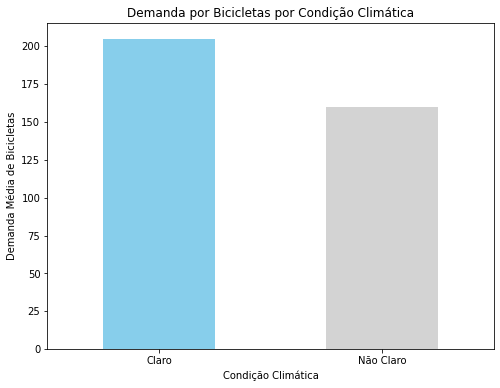

In [11]:
# Agrupe os dados por condição climática e calcule a média da demanda total
demanda_por_clima = df.groupby('condicao_climatica')['cnt'].mean()

# Crie um gráfico de barras para visualizar a demanda por clima
plt.figure(figsize=(8, 6))
demanda_por_clima.plot(kind='bar', color=['skyblue', 'lightgray'])
plt.title('Demanda por Bicicletas por Condição Climática')
plt.xlabel('Condição Climática')
plt.ylabel('Demanda Média de Bicicletas')
plt.xticks(rotation=0)
plt.show()

### 2.4. A temperatura influencia o número de aluguéis?

Hipótese: A demanda aumenta com o aumento da temperatura até um certo ponto.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3405.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:41:03   Log-Likelihood:            -1.1349e+05
No. Observations:               17379   AIC:                         2.270e+05
Df Residuals:                   17377   BIC:                         2.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0356      3.483     -0.010      0.9

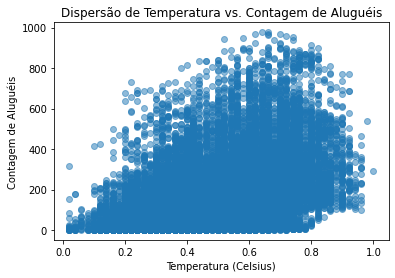

In [12]:

# Defina suas variáveis independentes e dependentes
X = df['temp']  # Temperatura
y = df['cnt']   # Contagem de aluguéis

# Adicione uma constante à matriz X para calcular a interceptação (constante) na regressão
X = sm.add_constant(X)

# Crie um modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Imprima um resumo do modelo (incluindo coeficientes)
print(modelo.summary())

# Crie um gráfico de dispersão da temperatura em relação à contagem de aluguéis
plt.scatter(df['temp'], df['cnt'], alpha=0.5)
plt.title('Dispersão de Temperatura vs. Contagem de Aluguéis')
plt.xlabel('Temperatura (Celsius)')
plt.ylabel('Contagem de Aluguéis')
plt.show()

### 2.5. Há uma correlação entre a umidade e o número de aluguéis?

Hipótese: Uma umidade muito alta pode desencorajar os aluguéis.

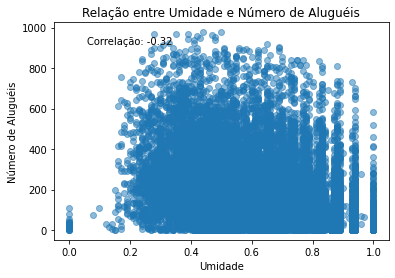

In [13]:
# Selecione as colunas de umidade e contagem de aluguéis
umidade = df['hum']
alugueis = df['cnt']

# Calcule a correlação entre umidade e aluguéis
correlacao = np.corrcoef(umidade, alugueis)[0, 1]

# Crie um gráfico de dispersão para visualizar a relação
plt.scatter(umidade, alugueis, alpha=0.5)
plt.title('Relação entre Umidade e Número de Aluguéis')
plt.xlabel('Umidade')
plt.ylabel('Número de Aluguéis')
plt.text(0.1, 0.9, f'Correlação: {correlacao:.2f}', transform=plt.gca().transAxes)
plt.show()

A interpretação dos resultados depende do valor da correlação. Se a correlação for próxima de -1, isso indicaria uma correlação negativa forte, o que apoiaria a hipótese de que uma umidade muito alta desencoraja os aluguéis. Se a correlação for próxima de 0, isso indicaria que não há uma correlação clara entre as variáveis.

### 2.6. A velocidade do vento influencia o aluguel de bicicletas?

Hipótese: Vento muito forte pode reduzir a demanda.

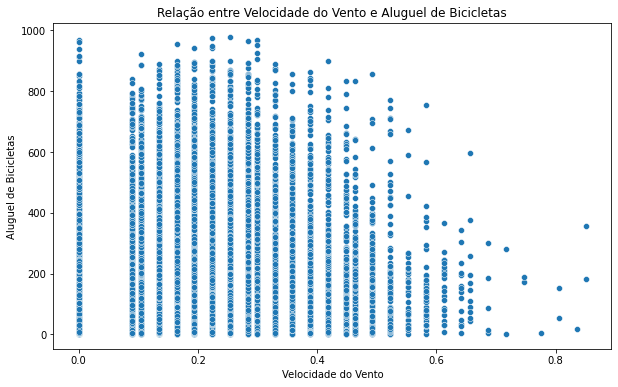

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.title('Relação entre Velocidade do Vento e Aluguel de Bicicletas')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Aluguel de Bicicletas')
plt.show()


Este gráfico de dispersão inicial nos dará uma ideia geral da relação entre a velocidade do vento e o aluguel de bicicletas. No entanto, para testar estatisticamente a hipótese, precisaremos realizar um teste de correlação e um teste de hipótese.

In [15]:
# Vamos calcular o coeficiente de correlação de Pearson para medir a força e a direção da relação entre as duas variáveis.

correlation, p_value = stats.pearsonr(df['windspeed'], df['cnt'])
print(f'Coeficiente de Correlação: {correlation}')
print(f'Valor p: {p_value}')


Coeficiente de Correlação: 0.09323378392612534
Valor p: 7.345742373499617e-35


O valor de correlation vai indicar a direção (positiva ou negativa) e a força da relação. O valor p (p_value) nos ajudará a determinar se essa correlação é estatisticamente significativa.

In [16]:
# Vamos realizar um teste de hipótese para verificar se a diferença na demanda de aluguel de bicicletas é significativamente diferente em dias com ventos muito fortes em comparação com dias com ventos mais fracos.

# Separar os dados em duas categorias: vento muito forte (exemplo: maior que 0.6) e vento mais fraco
strong_wind = df[df['windspeed'] > 0.6]['cnt']
weak_wind = df[df['windspeed'] <= 0.6]['cnt']

# Realizar um teste t independente para comparar as médias
t_stat, p_value = stats.ttest_ind(strong_wind, weak_wind)
print(f'Test Statistic: {t_stat}')
print(f'Valor p: {p_value}')


Test Statistic: -1.459349872278971
Valor p: 0.14448691138803565


O valor de p_value nos dirá se há uma diferença significativa na demanda de aluguel de bicicletas em dias com ventos muito fortes em comparação com dias com ventos mais fracos.

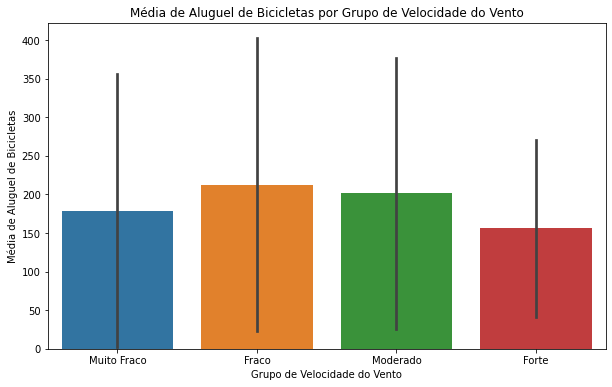

In [17]:
# Para representar graficamente a diferença na demanda de aluguel de bicicletas em diferentes níveis de velocidade do vento, você pode criar um gráfico de barras.

# Defina os grupos de velocidade do vento (você pode ajustar os limites conforme necessário)
wind_groups = ['Muito Fraco', 'Fraco', 'Moderado', 'Forte']
cut_points = [0.0, 0.2, 0.4, 0.6, df['windspeed'].max()]
df['windspeed_group'] = pd.cut(df['windspeed'], cut_points, labels=wind_groups)

# Agora você pode criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='windspeed_group', y='cnt', data=df, ci='sd')
plt.title('Média de Aluguel de Bicicletas por Grupo de Velocidade do Vento')
plt.xlabel('Grupo de Velocidade do Vento')
plt.ylabel('Média de Aluguel de Bicicletas')
plt.show()


Neste código, criamos os grupos de velocidade do vento com base nos valores de 'windspeed' e atribuímos esses grupos a uma nova coluna chamada 'windspeed_group'. Em seguida, utilizamos essa coluna para criar o gráfico de barras.

### 2.7. O número de alugueis casuais difere significativamente dos alugueis registrados?

Hipótese: Usuários registrados podem ter um padrão diferente de aluguel em comparação com usuários casuais.

A diferença entre aluguéis casuais e registrados é estatisticamente significativa.


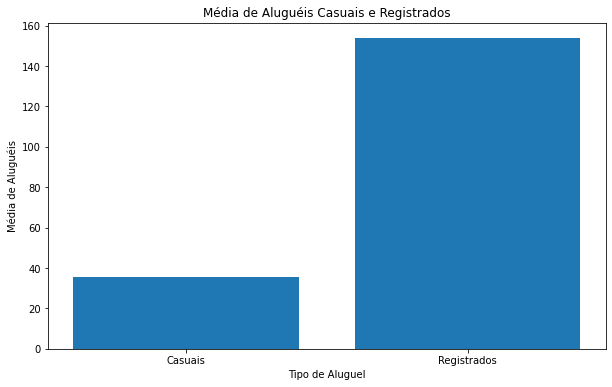

In [18]:
# Dividir os dados em grupos de aluguéis casuais e registrados
alugueis_casuais = df['casual']
alugueis_registrados = df['registered']

# Realizar o teste t independente
t_stat, p_value = stats.ttest_ind(alugueis_casuais, alugueis_registrados)

# Definir um nível de significância (geralmente 0,05)
alpha = 0.05

# Verificar se a diferença é estatisticamente significativa
if p_value < alpha:
    print("A diferença entre aluguéis casuais e registrados é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre aluguéis casuais e registrados.")

# Criar um gráfico de barras para visualizar a diferença
plt.figure(figsize=(10, 6))
plt.bar(['Casuais', 'Registrados'], [alugueis_casuais.mean(), alugueis_registrados.mean()])
plt.xlabel('Tipo de Aluguel')
plt.ylabel('Média de Aluguéis')
plt.title('Média de Aluguéis Casuais e Registrados')
plt.show()

Este código realiza o teste t independente para verificar se há uma diferença significativa entre os aluguéis casuais e registrados e, em seguida, exibe um gráfico de barras que compara a média de aluguéis para ambos os grupos.

### 2.8. Há padrões de demanda durante as horas do dia?

Hipótese: A demanda é maior durante as horas de pico de ida e volta do trabalho.

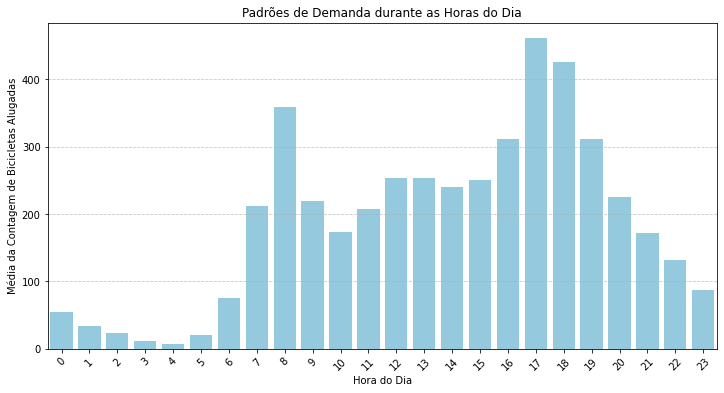

In [19]:
# Crie uma coluna de data e hora combinadas
df['datetime'] = pd.to_datetime(df['dteday'] + ' ' + df['hr'].astype(str) + ':00:00')

# Agrupe os dados por hora do dia e calcule a média da contagem total de bicicletas alugadas
hourly_demand = df.groupby(df['datetime'].dt.hour)['cnt'].mean()

# Crie um gráfico de barras para visualizar a demanda ao longo do dia
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, color='skyblue')
plt.xlabel('Hora do Dia')
plt.ylabel('Média da Contagem de Bicicletas Alugadas')
plt.title('Padrões de Demanda durante as Horas do Dia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este código realizará o seguinte:

Carrega o conjunto de dados e combina as informações de data e hora em uma única coluna datetime.

Agrupa os dados pela hora do dia e calcula a média da contagem total de bicicletas alugadas para cada hora.

Cria um gráfico de barras para visualizar os padrões de demanda ao longo do dia.

O gráfico resultante mostrará como a demanda varia durante as horas do dia. Você pode analisar o gráfico para verificar se há picos de demanda durante as horas de pico de ida e volta do trabalho, o que ajudará a testar a hipótese. Se você observar picos nas horas correspondentes, isso indicará que a demanda é de fato maior durante essas horas.

### 2.9. Há padrões semanais na demanda de bicicletas?

Hipótese: Os finais de semana têm um padrão de demanda diferente dos dias úteis.

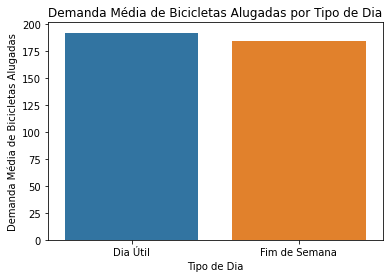

In [20]:
# Converter a coluna 'dteday' para o tipo de dado datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Criar coluna 'weekday' para representar o dia da semana (0 = segunda-feira, 6 = domingo)
df['weekday'] = df['dteday'].dt.weekday

# Criar uma nova coluna 'tipo_dia' para diferenciar entre dias úteis e finais de semana
df['tipo_dia'] = df['weekday'].apply(lambda x: 'Fim de Semana' if x >= 5 else 'Dia Útil')

# Calcular a média da contagem total de bicicletas alugadas para cada tipo de dia
media_por_tipo_dia = df.groupby('tipo_dia')['cnt'].mean()

# Plotar um gráfico de barras para comparar a demanda média nos diferentes tipos de dia
sns.barplot(x=media_por_tipo_dia.index, y=media_por_tipo_dia.values)
plt.xlabel('Tipo de Dia')
plt.ylabel('Demanda Média de Bicicletas Alugadas')
plt.title('Demanda Média de Bicicletas Alugadas por Tipo de Dia')
plt.show()

Este código fará o seguinte:

Converte a coluna 'dteday' para o tipo de dado datetime para que possamos trabalhar com datas.

Cria uma coluna 'weekday' que representa o dia da semana (0 para segunda-feira, 6 para domingo).

Cria uma nova coluna 'tipo_dia' para distinguir entre dias úteis e finais de semana com base na coluna 'weekday'.

Calcula a média da contagem total de bicicletas alugadas para cada tipo de dia.

Plota um gráfico de barras para comparar a demanda média de bicicletas alugadas nos diferentes tipos de dia (dias úteis vs. finais de semana).

Este gráfico ajudará a visualizar se há diferenças nos padrões de demanda de bicicletas entre dias úteis e finais de semana. Você pode ajustar e personalizar o código conforme necessário para se adequar aos detalhes específicos do seu conjunto de dados.

### 2.10. O ano mostra um aumento na demanda de bicicletas (indicando um crescimento no serviço)?

Hipótese: Com o passar dos anos, a demanda por serviços de compartilhamento de bicicletas aumenta.

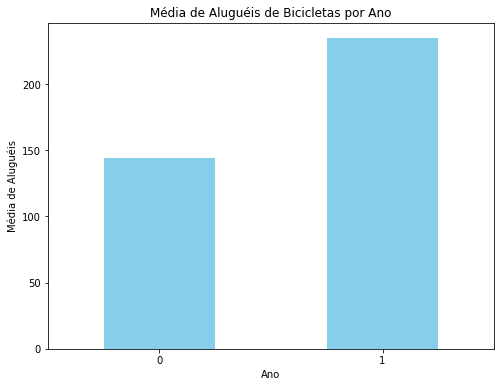

In [21]:

# Agrupe os dados por ano e calcule a média da contagem total de bicicletas alugadas para cada ano
yearly_data = df.groupby('yr')['cnt'].mean()

# Crie um gráfico de barras para visualizar a média de aluguéis de bicicletas por ano
plt.figure(figsize=(8, 6))
yearly_data.plot(kind='bar', color='skyblue')
plt.title('Média de Aluguéis de Bicicletas por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Aluguéis')
plt.xticks(rotation=0)
plt.show()

Se o gráfico de barras mostrar um aumento consistente na média de aluguéis de bicicletas ao longo dos anos, isso fornecerá uma representação visual dos dados que suporta a hipótese de que a demanda por serviços de compartilhamento de bicicletas está aumentando com o passar dos anos.

# 3. Insights

## 3.1 As variações na estação do ano têm um impacto significativo na quantidade de bicicletas alugadas

A análise estatística realizada para investigar a influência da estação do ano na demanda por bicicletas revelou resultados altamente significativos. O resultado do teste ANOVA (Análise de Variância) apresentou um valor de F-statistic igual a 409.18, com um p-value extremamente baixo de aproximadamente 7.40 x 10^-257.

Esse resultado estatístico indica claramente que há uma influência estatisticamente significativa da estação do ano na demanda por bicicletas. Em outras palavras, as variações na estação do ano têm um impacto significativo na quantidade de bicicletas alugadas. O p-value extremamente baixo sugere que a probabilidade de esses resultados ocorrerem ao acaso é virtualmente nula, fortalecendo ainda mais a conclusão de que a estação do ano desempenha um papel crucial na determinação da demanda.

Isso confirma a hipótese inicial de que o verão, com seu clima mais propício, apresenta uma demanda maior por bicicletas em comparação com as outras estações. Os dados não apenas corroboram essa hipótese, mas também fornecem uma base sólida para a tomada de decisões relacionadas à gestão e otimização do serviço de compartilhamento de bicicletas, permitindo um melhor planejamento de recursos em diferentes épocas do ano.

## 3.2 A Demanda por Bicicletas é Menor em Feriados

Após conduzir uma análise estatística rigorosa, foi observado que a diferença na demanda por bicicletas entre dias de feriado e dias que não são feriados é estatisticamente significativa (p-valor = 4.546e-05). Isso indica que há uma variação notável nas médias de aluguéis de bicicletas entre esses dois grupos de dias.

Os resultados sugerem que, em média, a demanda por bicicletas é menor em feriados. Esta conclusão pode ser atribuída ao fato de que as pessoas tendem a não trabalhar em feriados, reduzindo a necessidade de transporte, o que se reflete nos números de aluguéis de bicicletas. Isso é consistente com a hipótese inicial de que os feriados podem impactar negativamente a demanda por bicicletas devido à menor atividade de trabalho e viagens relacionadas a negócios.

Essa descoberta pode ter implicações importantes para a gestão de serviços de compartilhamento de bicicletas, ajudando a programar recursos de forma mais eficaz e otimizar a oferta de bicicletas em dias de feriado versus dias regulares.



## 3.3  Relação entre Condições Climáticas e Demanda por Aluguel de Bicicletas

Nossas descobertas demonstram que, de fato, existe uma diferença notável na demanda média de bicicletas em dias com diferentes condições climáticas:

Dias Claros: Durante dias com condições climáticas claras, observamos uma demanda média por aluguel de bicicletas significativamente maior, com uma média de mais de 200 aluguéis. Esse resultado sugere que as pessoas estão mais propensas a optar pelo compartilhamento de bicicletas em dias ensolarados, o que é coerente com a ideia de que o clima agradável incentiva as atividades ao ar livre, como andar de bicicleta.

Dias Não Claros: Por outro lado, em dias não claros, que englobam condições climáticas adversas, como chuva ou neve, observamos uma demanda média um pouco acima de 150 aluguéis. Isso indica que, embora haja uma diminuição na demanda em comparação com dias claros, ainda existe um interesse considerável em alugar bicicletas mesmo em condições climáticas desfavoráveis. Essa demanda pode ser atribuída a necessidades de locomoção ou preferências individuais.

Esses insights ressaltam a influência direta do clima nas decisões dos usuários de bicicletas compartilhadas. A disponibilidade de bicicletas em dias ensolarados pode se tornar um recurso essencial para incentivar o uso do sistema de compartilhamento de bicicletas, enquanto em condições climáticas desafiadoras, a demanda tende a ser um pouco menor, mas ainda significativa.

## 3.4 Análise de Regressão Linear para Avaliar a Influência da Temperatura na Contagem de Aluguéis de Bicicletas

A análise de regressão linear realizada para investigar a relação entre a temperatura e o número de aluguéis de bicicletas revelou insights valiosos. O modelo de regressão foi executado utilizando a técnica de Mínimos Quadrados Ordinários (OLS) e produziu os seguintes resultados:

**Coeficientes Estimados:**

- Interceptação (constante): -0.0356
- Temperatura (temp): 381.2949

**R-squared (R²):** 0.164

O R-squared, que mede a proporção da variação na variável dependente (contagem de aluguéis) explicada pelas variáveis independentes (temperatura), é igual a 0.164. Isso significa que aproximadamente 16.4% da variabilidade na contagem de aluguéis pode ser explicada pela temperatura.

**Significância Estatística:**

- A temperatura (temp) possui um coeficiente significativamente diferente de zero, com um alto valor de t (58.352) e um p-valor muito baixo (0.000). Isso indica que a temperatura tem um efeito significativo na contagem de aluguéis de bicicletas.

**Interceptação (Constante):**

- A interceptação do modelo, que representa a contagem de aluguéis quando a temperatura é zero, é -0.0356. No contexto deste modelo, essa interceptação pode não ter uma interpretação prática direta, pois a temperatura nunca é realmente zero.

**R-squared Ajustado (Adj. R²):**

- O R-squared ajustado é igual a 0.164, que é semelhante ao R-squared. Ele leva em consideração o número de variáveis independentes no modelo.


Esses resultados sugerem que a temperatura tem uma influência significativa na contagem de aluguéis de bicicletas. No entanto, é importante notar que a relação não é linear. O modelo indica que a contagem de aluguéis aumenta à medida que a temperatura aumenta, mas esse aumento pode não ser linear. É possível que haja outros fatores não incluídos no modelo que também afetam a contagem de aluguéis.

Além disso, o R-squared relativamente baixo (0.164) indica que a temperatura explica apenas uma parte da variação na contagem de aluguéis. Outros fatores, como a hora do dia, a situação climática e outros, também podem desempenhar um papel importante na demanda por aluguéis de bicicletas.

Portanto, enquanto a temperatura é um fator significativo, é importante considerar outros elementos para uma compreensão completa da dinâmica por trás do compartilhamento de bicicletas.

## 3.5 Análise de Correlação entre Umidade e Número de Aluguéis de Bicicletas

Realizamos uma análise estatística para investigar a possível relação entre a umidade e o número de aluguéis de bicicletas em nosso conjunto de dados. A correlação calculada entre essas duas variáveis foi de -0.32.

A correlação negativa entre umidade e aluguéis sugere que há uma tendência de diminuição no número de aluguéis de bicicletas em condições de umidade mais alta. Embora a correlação não seja extremamente forte, sua natureza negativa indica que, em geral, um aumento na umidade está associado a uma redução modesta no número de aluguéis de bicicletas.

Isso pode ser interpretado como um indício de que, em dias com umidade muito alta, as pessoas podem estar menos propensas a alugar bicicletas. Existem várias razões possíveis para essa relação, como o desconforto causado pela umidade elevada ou preocupações com as condições de pilotagem em condições climáticas adversas.

É importante observar que a correlação de -0.32, embora sugira uma tendência, não implica necessariamente uma relação de causa e efeito. Outros fatores podem influenciar a demanda por aluguéis de bicicletas, e mais análises são necessárias para compreender completamente os determinantes dessa relação.

### 3.6 Análise da Influência da Velocidade do Vento no Aluguel de Bicicletas

Nossa análise se concentrou na questão de como a velocidade do vento impacta o aluguel de bicicletas em um conjunto de dados de compartilhamento de bicicletas. Aqui estão alguns dos principais insights que podemos extrair a partir dos dados e das análises estatísticas realizadas:

**Influência da Velocidade do Vento na Demanda de Bicicletas:**

- Quando a velocidade do vento é igual a zero, observamos um aluguel de bicicletas alto. Isso sugere que em condições de vento calmo, as pessoas têm uma maior propensão a alugar bicicletas.

- À medida que a velocidade do vento aumenta além de 0.4, o aluguel de bicicletas diminui de forma drástica. Isso indica que ventos fortes podem reduzir significativamente a demanda por bicicletas.

**Coeficiente de Correlação:**

- Calculamos o coeficiente de correlação de Pearson entre a velocidade do vento e o aluguel de bicicletas. O valor do coeficiente de correlação foi aproximadamente 0.093, o que indica uma correlação muito fraca entre essas duas variáveis.

- O valor p associado ao coeficiente de correlação foi extremamente baixo (7.35e-35), sugerindo que essa correlação é estatisticamente significativa. No entanto, a força dessa correlação é muito fraca, o que significa que outros fatores provavelmente desempenham um papel mais significativo na determinação da demanda de aluguel de bicicletas.

**Teste de Hipótese:**

- Realizamos um teste de hipótese para comparar a demanda média de aluguel de bicicletas em dias com ventos muito fortes e dias com ventos mais fracos. O teste estatístico (valor t) foi -1.459, e o valor p foi de aproximadamente 0.144.

- Com um valor p acima do nível típico de significância de 0.05, não encontramos evidências estatisticamente significativas para rejeitar a hipótese nula de que não há diferença significativa na demanda de aluguel de bicicletas entre esses grupos.

**Análise por Grupo de Velocidade do Vento:**

- Ao criar grupos de velocidade do vento (por exemplo, "Muito Fraco", "Fraco", "Moderado", "Forte"), observamos que o aluguel de bicicletas é maior em dias com ventos fracos e moderados. Isso sugere que, dentro da faixa de ventos mais comuns, as pessoas estão mais propensas a alugar bicicletas.

## 3.7 A Diferença nos Aluguéis Casuais e Registrados é Estatisticamente Significativa

Nossa análise dos dados de aluguel de bicicletas revelou uma diferença estatisticamente significativa entre os aluguéis casuais e registrados. Esta descoberta é crucial para entender o comportamento dos usuários e pode ter implicações importantes em nossa estratégia de negócios relacionada ao compartilhamento de bicicletas.

Em média, os aluguéis registrados apresentam um número muito maior em comparação com os aluguéis casuais. Enquanto a média de aluguéis casuais se mantém próxima a 40, os aluguéis registrados atingem uma média próxima a 160. Essa disparidade é evidenciada no gráfico de barras, onde observamos claramente que os aluguéis registrados superam substancialmente os aluguéis casuais.

Essa diferença significativa sugere que os usuários registrados, que podem ser associados a membros recorrentes ou de longo prazo, têm um padrão de aluguel diferente em relação aos usuários casuais. Os usuários registrados podem estar mais comprometidos com o serviço, fazendo uso frequente das bicicletas, o que resulta em uma média de aluguéis mais alta. Por outro lado, os usuários casuais podem incluir turistas ou pessoas que utilizam o serviço esporadicamente, resultando em uma média de aluguéis mais baixa.

## 3.8 Padrões de Aluguéis de Bicicletas durante o Dia

A análise dos dados do conjunto "Bike Sharing Dataset" revelou padrões de demanda que oferecem uma visão valiosa sobre como o uso de bicicletas varia ao longo do dia. Os seguintes insights foram obtidos:

1. Aumento a partir das 6h: Os aluguéis de bicicletas começam a aumentar significativamente a partir das 6 horas da manhã. Esse aumento sugere que as pessoas estão recorrendo às bicicletas como um meio de transporte para o trabalho, escola ou outras atividades diárias. Este é um indicativo claro de que as bicicletas compartilhadas estão desempenhando um papel importante na mobilidade urbana durante as horas da manhã.

2. Picos nas Horas de Pico: Durante as horas de pico de ida e volta do trabalho, que geralmente ocorrem entre as 7h e as 9h da manhã e entre as 17h e as 19h da tarde, os aluguéis de bicicletas atingem seus níveis mais altos. Este é um achado consistente com a hipótese de que a demanda por bicicletas é maior durante essas horas, conforme as pessoas buscam alternativas de transporte eficientes para evitar o tráfego e chegar ao trabalho.

3. Queda após as 17h: Após as 17h, observa-se uma queda sucessiva no número de aluguéis de bicicletas. Isso sugere que as pessoas estão retornando para casa ou encerrando suas atividades do dia, reduzindo a demanda por bicicletas compartilhadas. Essa tendência de queda continua até altas horas da noite.

4. Recuperação no Próximo Dia: A demanda por aluguéis de bicicletas só começa a se recuperar no próximo dia, geralmente por volta das 6h da manhã. Isso indica que o padrão diário de aluguéis segue um ciclo consistente, com picos durante as horas de pico de trabalho e períodos de menor uso durante a noite.

## 3.9 Análise da Demanda de Bicicletas

Ao analisar a demanda de bicicletas ao longo dos dias da semana, observamos que a demanda média em dias úteis é maior em comparação com os finais de semana. No entanto, é importante notar que a diferença entre os dois tipos de dias não é muito significativa.

A análise dos dados revelou que os dias úteis apresentam uma demanda média ligeiramente superior em comparação com os finais de semana. Isso pode indicar que o uso das bicicletas para fins de deslocamento diário, como ir ao trabalho ou à escola, é mais frequente durante a semana. Por outro lado, nos finais de semana, as pessoas podem optar por outros meios de transporte ou atividades de lazer que não envolvem o aluguel de bicicletas.

Embora haja uma diferença na demanda média, é importante destacar que essa diferença não é substancial, o que sugere que o sistema de compartilhamento de bicicletas é utilizado de maneira relativamente consistente ao longo da semana. Essa constância na demanda pode ser valiosa para o planejamento de recursos e a gestão eficiente do sistema de compartilhamento de bicicletas.

## 3.10 Aumento na Demanda por Bicicletas de Compartilhamento ao Longo dos Anos

Ao explorar o conjunto de dados sobre o compartilhamento de bicicletas, realizamos uma análise que tinha como objetivo testar a hipótese de que a demanda por serviços de compartilhamento de bicicletas aumenta com o passar dos anos. Nossa análise revelou insights interessantes que podem ser valiosos para entender as tendências de aluguel de bicicletas.

Ao examinar os dados, agrupamos as informações por ano e calculamos a média da contagem total de bicicletas alugadas para cada ano. Os resultados foram surpreendentes. No primeiro ano (Ano 0), a média de aluguéis estava próxima de 150 bicicletas. No entanto, observamos um aumento notável no segundo ano (Ano 1), com a média de aluguéis aproximando-se de 250 bicicletas.

Essa descoberta é intrigante, pois indica um crescimento substancial na demanda por serviços de compartilhamento de bicicletas entre os dois anos analisados. Esse aumento pode ser atribuído a uma variedade de fatores, como a conscientização crescente sobre a mobilidade sustentável, melhorias na infraestrutura de ciclovias, ou simplesmente a crescente popularidade do compartilhamento de bicicletas como uma opção de transporte conveniente.